In [51]:
import pandas, matplotlib.pyplot as plt, numpy

In [52]:
df = pandas.read_table('exported.txt')
samples = df['Sample Name']
zeta = df['Zeta Potential (mV)']

samples = samples.str.split('(\d+)([A-Za-z]+)',expand=True)
samples.drop(0, axis=1, inplace=True)
samples.columns = ['pH_nominal', 'mortality', 'run']
samples['pH'] = ""

actual_pHs = {'2':1.999,
              '4':4.168,
              '6':5.956,
              '8':7.520,
              '10':9.943,
              '12':11.990}

for pH_string in actual_pHs:
    samples.loc[samples['pH_nominal'] == pH_string, 'pH'] = actual_pHs[pH_string]
    
df_sz = pandas.concat([samples, zeta], axis=1)
df_sz['pH'] = pandas.to_numeric(df_sz['pH'])

duds = df_sz.loc[df_sz['run'].str.contains("_") == True]
duds_indices = duds.index.values

df_sz = df_sz.drop(duds_indices)

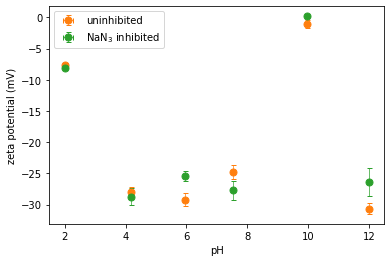

<Figure size 432x288 with 0 Axes>

In [53]:
mortalities = ['a', 'd']
labels = ['uninhibited', 'NaN$_3$ inhibited']
colors = ['tab:orange', 'tab:green']


labels_by_mortality = dict(zip(mortalities, labels))
colors_by_mortality = dict(zip(mortalities, colors))

fig = plt.figure()

for mort in mortalities:
    df = df_sz.loc[df_sz['mortality'] == mort]
    df_grp = df.groupby('pH_nominal')[['pH', 'Zeta Potential (mV)']]
    
    y = df_grp.mean()['Zeta Potential (mV)']
    yerr = df_grp.std()['Zeta Potential (mV)']/numpy.sqrt(3)
    x = df_grp.mean()['pH']
    xerr = df_grp.std()['pH']/numpy.sqrt(3)
        
    plt.errorbar(x=x,
                 xerr=xerr,
                 y=y,
                 yerr=yerr,
                 fmt='o',
                 capsize=2.5,  
                 elinewidth=0.7, 
                 markersize=7, 
                 linewidth=4,
                 label=labels_by_mortality[mort],
                 color=colors_by_mortality[mort]) 
    
plt.xlabel('pH')
plt.ylabel('zeta potential (mV)')
plt.legend()
plt.show()
plt.draw()

In [54]:
fig.savefig('zeta_vs_pH.png', dpi=600)

In [33]:
df_grp = df_alive.groupby('pH_nominal')[['pH', 'Zeta Potential (mV)']]
df_grp.mean()
df_grp.std()['pH']

pH_nominal
10    0.0
12    0.0
2     0.0
4     0.0
6     0.0
8     0.0
Name: pH, dtype: float64

In [29]:
df

,pH_nominal,mortality,run,pH,Zeta Potential (mV)
19,8,d,1,8.01,-24.900
20,8,d,2,8.01,-28.100
21,8,d,3,8.01,-30.100
22,12,d,1,12.01,-22.500
23,12,d,2,12.01,-26.600
24,12,d,3,12.01,-30.200
28,6,d,1,6.01,-24.100
29,6,d,2,6.01,-25.300
30,6,d,3,6.01,-26.800
31,10,d,1,10.01,0.147
